In [1]:
import pymongo
from pymongo import MongoClient
from pprint import pprint #para que imprima "bonito"
import json
from bson.json_util import dumps
import datetime
client = MongoClient('mongodb://10.233.42.60:27017') # Establece una conexión a MongoDB
#client = MongoClient('mongodb://localhost:27017')
db = client['local'] # Seleccionamos la base de datos "local". 
#También funciona el acceso a través del atributo:
#db = client.local
pacientes = db['PacientesRT'] # Seleccionamos la colección "PacientesRT", que está dentro de la base de datos local

In [19]:
start_date = datetime.datetime(2020, 1, 1, 0, 0,0)
end_date = datetime.datetime(2020, 3, 31, 0, 0, 0)

In [3]:
# Busca pacientes con planificaciones dentro de rango de fechas 
# y guardamos en una lista para hacer consultas posteriores
# Como Planificaciones es una lista, hay que usar 'elemMatch' para que la condicion de inicio 
# y de fin se apliquen ambas a cada elemento
consulta = pacientes.find({'Casos.Trials.Planificaciones':{'$elemMatch':{'FechaInicio':{'$gt':start_date,'$lt':end_date}}}})
list_consulta = [x for x in consulta] # Volcamos el cursor en una lista que podamos manipular
ncon = len(list_consulta)
print(f'Numero de pacientes que cumplen la consulta: {ncon}')

Numero de pacientes que cumplen la consulta: 334


In [4]:
cont_planis = 0
cont_tecnica = {'2D Simple': 0, '3DCRT': 0, 'IMRT Step & Shoot': 0, 'Siemens mArc': 0, 'VMAT': 0, 'SC':0}
cont_tecnica0 = {'2D Simple': 0, '3DCRT': 0, 'IMRT Step & Shoot': 0, 'Siemens mArc': 0, 'VMAT': 0, 'SC':0}
cont_tecnica1 = {'2D Simple': 0, '3DCRT': 0, 'IMRT Step & Shoot': 0, 'Siemens mArc': 0, 'VMAT': 0, 'SC':0}
cont_tecnica2 = {'2D Simple': 0, '3DCRT': 0, 'IMRT Step & Shoot': 0, 'Siemens mArc': 0, 'VMAT': 0, 'SC':0}
cont_ALES = {'Siemens Primus':0, 'Siemens Oncor': 0, 'Elekta Versa': 0}
cont_ALESsTecnicas = {'Siemens Primus':cont_tecnica0, 'Siemens Oncor': cont_tecnica1, 'Elekta Versa': cont_tecnica2}
fecha_str = ''
for p in list_consulta:
    nuhsa = p['ID']
    nombre = p['Nombre']
    #print(nuhsa + ' ' + nombre)
    for c in p['Casos']:
        if 'Trials' in c:
            for t in c['Trials']:
                if 'Planificaciones' in t:
                    for pl in t['Planificaciones']:
                        if start_date <= pl['FechaInicio'] <= end_date:
                            if 'Motivo' in pl:
                                cont_planis = cont_planis + 1  
                                if 'Acelerador' in pl:
                                    cont_ALES[pl['Acelerador']] = cont_ALES[pl['Acelerador']] + 1
                                    if 'Tecnica' in pl:
                                        cont_ALESsTecnicas[pl['Acelerador']][pl['Tecnica']] = cont_ALESsTecnicas[pl['Acelerador']][pl['Tecnica']] + 1
                                    else:
                                        cont_ALESsTecnicas[pl['Acelerador']]['SC'] = cont_ALESsTecnicas[pl['Acelerador']]['SC'] + 1
                        else:
                            fecha_str =pl['FechaInicio']
                            #print(f'NO cumple criterio: {fecha_str}')    
print(f'Numero total de planificaciones: {cont_planis}')
print(f'Planificaciones por acelerador:')
for x in cont_ALES:
    y = cont_ALES[x]
    print(f'{x}: {y}')
print('')
print(f'Planificaciones por acelerador y tecnica:')
for ale in cont_ALESsTecnicas:
    print(f'{ale}:')
    for tec in cont_ALESsTecnicas[ale]:
        num = cont_ALESsTecnicas[ale][tec]
        print(f'    {tec}: {num}')

Numero total de planificaciones: 338
Planificaciones por acelerador:
Siemens Primus: 83
Siemens Oncor: 139
Elekta Versa: 116

Planificaciones por acelerador y tecnica:
Siemens Primus:
    2D Simple: 1
    3DCRT: 59
    IMRT Step & Shoot: 22
    Siemens mArc: 0
    VMAT: 0
    SC: 1
Siemens Oncor:
    2D Simple: 0
    3DCRT: 55
    IMRT Step & Shoot: 83
    Siemens mArc: 0
    VMAT: 0
    SC: 1
Elekta Versa:
    2D Simple: 0
    3DCRT: 14
    IMRT Step & Shoot: 92
    Siemens mArc: 0
    VMAT: 10
    SC: 0


In [5]:
# Consulta de número de SBRTs por patologías
consulta = pacientes.find({'Casos.Trials.Prescripciones':{'$elemMatch':{'FechaInicio':{'$gt':start_date,'$lt':end_date},'ProtocoloTto':'SBRT'}}})
list_consulta = [x for x in consulta] # Volcamos el cursor en una lista que podamos manipular
ncon = len(list_consulta)
print(f'Numero de pacientes con prescripción de SBRT: {ncon}')

cont_patologias = {'Adenocarcinomas': 0, 'Carcinomas': 0, 'Cervix': 0, 'Cabeza y cuello': 0, 'Glioma': 0, 'Linfomas': 0, 'Mama': 0, 'Pulmón': 0, 'Próstata': 0, 'Recto': 0}
for p in list_consulta:
    for c in p['Casos']:
        if 'Trials' in c:
            for t in c['Trials']:
                if 'Prescripciones' in t:
                    for pres in t['Prescripciones']:
                        if 'ProtocoloTto' in pres:
                            if pres['ProtocoloTto'] == 'SBRT':
                                cont_patologias[c['Patologia']] = cont_patologias[c['Patologia']] + 1
                                
for pat in cont_patologias: 
    num = cont_patologias[pat]
    print(f'{pat}: {num}')

Numero de pacientes con prescripción de SBRT: 1
Adenocarcinomas: 0
Carcinomas: 0
Cervix: 0
Cabeza y cuello: 0
Glioma: 0
Linfomas: 0
Mama: 0
Pulmón: 0
Próstata: 1
Recto: 0


In [20]:
# Inicios de tratamiento por maquina
consulta = pacientes.find({'Casos.Trials.SesionesTto.0.FechaInicio':{'$gt':start_date,'$lt':end_date}})
list_consulta = [x for x in consulta] # Volcamos el cursor en una lista que podamos manipular
ncon = len(list_consulta)
print(f'Numero de pacientes que cumplen la consulta: {ncon}')

cont_ALES = {'Siemens Primus':0, 'Siemens Oncor': 0, 'Elekta Versa': 0, 'Sin Acelerador': 0}
for p in list_consulta:
    for c in p['Casos']:
        if 'Trials' in c:
            for t in c['Trials']:
                if 'SesionesTto' in t:
                    fecha = t['SesionesTto'][0]['FechaInicio']
                    if start_date <= fecha <= end_date:
                        if 'Acelerador' in t['Planificaciones'][-1]:
                            maquina = t['Planificaciones'][-1]['Acelerador']
                            cont_ALES[maquina] = cont_ALES[maquina] + 1 
                        else:
                            cont_ALES['Sin Acelerador'] = cont_ALES['Sin Acelerador'] + 1 
print('Inicios de tratamiento por máquina:')
for x in cont_ALES:
    y = cont_ALES[x]
    print(f'   {x}: {y}')

Numero de pacientes que cumplen la consulta: 179
Inicios de tratamiento por máquina:
Siemens Primus: 0
Siemens Oncor: 109
Elekta Versa: 70
Sin Acelerador: 1


Numero de pacientes que cumplen la consulta: 351


Numero de pacientes que cumplen la consulta: 350
Numero de pacientes con problemas: 5
{'AN0346803087': 'MARIA ISABEL SEVILLANO CAMARGO. Demora simulacion-prescripcion de 74'}
{'AN0450940166': 'CARMEN GARCIA TORRES. Demora simulacion-prescripcion de 61'}
{'AN0490514550': 'ELOISA ORTIZ POLO. Demora prescripcion-planificación de 65'}
{'AN0566062291': 'ANGEL RODRIGUEZ PUERTA. Demora simulacion-prescripcion de 41'}
{'AN0615861283': 'AURELIO CRISPINIANO JIMENEZ. Fecha de planificación anterior a la prescripción, -4 días'}

Demoras simulación-prescripción
Demora media (días): 5.50828729281768
Desviación estándar en la demora: 6.612075663545166


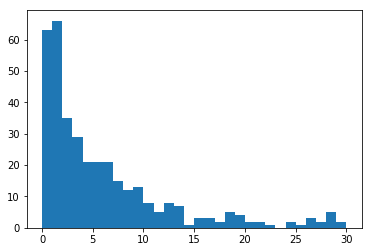

In [2]:
# Demora TAC-Prescripción

import pymongo
from pymongo import MongoClient
from pprint import pprint #para que imprima "bonito"
import json
from bson.json_util import dumps
import datetime
import numpy as np
import matplotlib.pyplot as plt

client = MongoClient('mongodb://10.233.42.60:27017') # Establece una conexión a MongoDB
db = client['local'] # Seleccionamos la base de datos "local". 
pacientes = db['PacientesRT'] # Seleccionamos la colección "PacientesRT", que está dentro de la base de datos local

start_date = datetime.datetime(2020, 1, 1, 0, 0,0)
end_date = datetime.datetime(2020, 3, 31, 0, 0, 0)

# Cálculo de demoras. Primero buscamos todos los pacientes con alguna planificacion en el periodo especificado
consulta = pacientes.find({'Casos.Trials.Planificaciones':{'$elemMatch':{'FechaInicio':{'$gt':start_date,'$lt':end_date}}}})
list_consulta = [x for x in consulta] # Volcamos el cursor en una lista que podamos manipular
ncon = len(list_consulta)
print(f'Numero de pacientes que cumplen la consulta: {ncon}')



demora_ct_pres = []
demora_pres_plan = []
demora_plan_ses = []
problemas = []
bool_problema = False

for p in list_consulta:
    an = p['ID']
    nombre = p['Nombre']
    bool_problema = False
    for c in p['Casos']:
        if 'Trials' in c:
            for t in c['Trials']:
                if ('Planificaciones' in t) and ('Prescripciones' in t) and ('Simulaciones' in t):
                    for pl in t['Planificaciones']:
                        if start_date <= pl['FechaInicio'] <= end_date:
                            # encuentra prescripcion y simulacion correspondiente. La de fecha más cercana
                            delta = datetime.datetime(2100, 12, 25, 0, 0, 0) - datetime.datetime(2000, 12, 25, 0, 0, 0)
                            for s in t['Simulaciones']:
                                if abs((pl['FechaInicio'] - s['FechaInicio']).days) < delta.days:
                                    delta = pl['FechaInicio'] - s['FechaInicio']
                                    sim = s
                            delta = datetime.datetime(2100, 12, 25, 0, 0, 0) - datetime.datetime(2000, 12, 25, 0, 0, 0)
                            for pr in t['Prescripciones']:
                                if abs((pl['FechaInicio'] - pr['FechaInicio']).days) < delta.days:
                                    delta = pl['FechaInicio'] - pr['FechaInicio']
                                    pres = pr                     
                            
                            delta = pres['FechaInicio'] - sim['FechaInicio']
                            if delta.days > 30:
                                mensaje = f'{nombre}. Demora simulacion-prescripcion de {delta.days}'
                                problemas.append({an: mensaje}) 
                                bool_problema = True
                            if delta.days < 0:
                                mensaje = f'{nombre}. Fecha de prescripción anterior a la simulación, {delta.days} días'
                                problemas.append({an: mensaje})
                                bool_problema = True
                            if bool_problema == False:
                                demora_ct_pres.append(delta.days)
                            else:
                                bool_problema = False
                            
                            delta = pl['FechaInicio'] - pres['FechaInicio']
                            if delta.days > 30:
                                mensaje = f'{nombre}. Demora prescripcion-planificación de {delta.days}'
                                problemas.append({an: mensaje}) 
                                bool_problema = True
                            if delta.days < 0:
                                mensaje = f'{nombre}. Fecha de planificación anterior a la prescripción, {delta.days} días'
                                problemas.append({an: mensaje})
                                bool_problema = True
                            if bool_problema == False:
                                demora_pres_plan.append(delta.days)
                            else:
                                bool_problema = False
                            
                            if 'SesionesTto' in t:
                                delta = t['SesionesTto'][0]['FechaInicio']-pl['FechaInicio']
                                demora_plan_ses.append(delta.days)

print(f'Numero de pacientes con problemas: {len(problemas)}')
for prob in problemas:
    print(prob)
print('')
print('Demoras simulación-prescripción')
demora_ct_pres = np.array(demora_ct_pres)
print(f'Demora media (días): {np.mean(demora_ct_pres)}')
print(f'Desviación estándar en la demora: {np.std(demora_ct_pres)}')
plt.hist(demora_ct_pres, bins = 30)
#plt.title('Demoras simulacion-prescripción')
plt.show()

In [24]:
import numpy as np
#demora_ct_pres2 = np.array([dem for dem in demora_ct_pres if dem < 200])
demora_ct_pres2 = np.array(demora_ct_pres)

In [25]:
print(np.mean(demora_ct_pres2))
print(np.std(demora_ct_pres2))

5.817438692098093
9.791110965062394


In [26]:
print(demora_ct_pres2)

[  1   0   0   0  28  74   6   1   6  12   1   1   5   5   5   7   1   1
   1   1   3   4   0   1  61  12   0   0  13  30   0   1  52   8   9   5
   1   7   1   5   5   0   0   2   4  16   6   6   0   8   1  24   1   8
   0   1   6   5   7   4   0  27   6   2   2   3   1  12   1   3   7   0
  12   1   1   9  19   6   3   0  13   1   3  30   6   0   1   4   4   7
   7   1   0   7   2   6   1   0   1  26   2   1   5  13  26   0   3   1
   1   1   5   1   5  11   4   3   4  10   2   4  17   4   8   2   1   1
   0   2   4   4  26   0   1   0   3   0  19   4   1   0   3   5   4   3
   5   1   0   3   8  28  10   7   1   1   0   8   0   3   0   1   9   2
  12   2  17   0   3   0   0   1   0   0  10   0  12   9   0   3   2   0
   4   2   1   1   0   0   2   1   0  21   6   3   0   7   0  16   2   1
  20  41   5  11   0   0   0   2   2   5  15   2   2   1  14   3   1  24
   3   0   0   3   2   3  11   0   0   5   3  13   9   0   2   3   3   9
  10   1   9   3   2   9   0   0   2   6  19   2  1

In [1]:
# Busqueda de pacientes con errores

import pymongo
from pymongo import MongoClient
from pprint import pprint #para que imprima "bonito"
import json
from bson.json_util import dumps
import datetime

def encuentra_problemas(p):
    problemas = []
    an = p['ID']
    nombre = p['Nombre']
    for c in p['Casos']:
        fecha_caso = c['FechaInicio']
        if 'Trials' in c:
            for t in c['Trials']:
                if('Planificaciones' in t):
                    for plan in t['Planificaciones']:
                        if 'Motivo' not in plan:
                            mensaje = f'{nombre}. Planificación sin motivo.'
                            problemas.append({an: mensaje}) 
                        if 'Acelerador' not in plan:
                            mensaje = f'{nombre}. Planificación sin acelerador.'
                            problemas.append({an: mensaje}) 
                        if 'Tecnica' not in plan:
                            mensaje = f'{nombre}. Planificación sin tecnica de tratamiento.'
                            problemas.append({an: mensaje}) 
                        #if 'Radiofisico' not in plan:
                            #mensaje = f'{nombre}. Planificación sin radiofisico.'
                            #problemas.append({an: mensaje}) 
                if('Prescripciones' in t):
                    for pres in t['Prescripciones']:
                        if 'Motivo' not in pres:
                            mensaje = f'{nombre}. Prescripción sin motivo.'
                            problemas.append({an: mensaje})
                        if 'DosisPTV1' not in pres:
                            mensaje = f'{nombre}. Prescripción sin dosis a PTV1.'
                            problemas.append({an: mensaje})
                if('Simulaciones' in t):
                    for sim in t['Simulaciones']:
                        if 'Motivo' not in sim:
                            mensaje = f'{nombre}. Simulación sin motivo.'
                            problemas.append({an: mensaje}) 
                        if 'Orientacion' not in sim:
                            mensaje = f'{nombre}. Simulación sin orientación.'
                            problemas.append({an: mensaje}) 
                if('Planificaciones' in t) and ('Prescripciones' not in t):
                    mensaje = f'{nombre}. Planificación sin prescripcion.'
                    problemas.append({an: mensaje}) 
                if('Prescripciones' in t) and ('Simulaciones' not in t):
                    mensaje = f'{nombre}. Prescripción sin simulación.'
                    problemas.append({an: mensaje}) 
                if ('Planificaciones' in t) and ('Prescripciones' in t) and ('Simulaciones' in t):
                    for pl in t['Planificaciones']:
                        # encuentra prescripcion y simulacion correspondiente. La de fecha más cercana
                        delta = datetime.datetime(2100, 12, 25, 0, 0, 0) - datetime.datetime(2000, 12, 25, 0, 0, 0)
                        for s in t['Simulaciones']:
                            if abs((pl['FechaInicio'] - s['FechaInicio']).days) < delta.days:
                                delta = pl['FechaInicio'] - s['FechaInicio']
                                sim = s
                        delta = datetime.datetime(2100, 12, 25, 0, 0, 0) - datetime.datetime(2000, 12, 25, 0, 0, 0)
                        for pr in t['Prescripciones']:
                            if abs((pl['FechaInicio'] - pr['FechaInicio']).days) < delta.days:
                                delta = pl['FechaInicio'] - pr['FechaInicio']
                                pres = pr                     
                        delta = pres['FechaInicio'] - sim['FechaInicio']
                        if delta.days > 30:
                            mensaje = f'{nombre}. Demora simulacion-prescripcion de {delta.days}'
                            problemas.append({an: mensaje}) 
                        if delta.days < 0:
                            mensaje = f'{nombre}. Fecha de prescripción anterior a la simulación, {delta.days} días'
                            problemas.append({an: mensaje})                             

                        delta = pl['FechaInicio'] - pres['FechaInicio']
                        if delta.days > 30:
                            mensaje = f'{nombre}. Demora prescripcion-planificación de {delta.days}'
                            problemas.append({an: mensaje}) 
                        if delta.days < 0:
                            mensaje = f'{nombre}. Fecha de planificación anterior a la prescripción, {delta.days} días'
                            problemas.append({an: mensaje})
                    # Busca pacientes con planificación pero sin sesiones de tto
                    delta = end_date - pl['FechaInicio']
                    if delta.days > 30:
                        if 'SesionesTto' not in t:
                            fecha_plan = pl['FechaInicio'].strftime("%d/%m/%Y")
                            mensaje = f'{nombre}. La planificacion {fecha_plan} no tiene sesiones de tratamiento, {delta.days} días'
                            #problemas.append({an: mensaje}) 
    return problemas



client = MongoClient('mongodb://10.233.42.60:27017') # Establece una conexión a MongoDB
db = client['local'] # Seleccionamos la base de datos "local". 
pacientes = db['PacientesRT'] # Seleccionamos la colección "PacientesRT", que está dentro de la base de datos local

# Periodo de fechas en el que se hace la consulta
start_date = datetime.datetime(2020, 1, 1, 0, 0,0)
end_date = datetime.datetime(2020, 3, 31, 0, 0, 0)

# Consultamos todos los casos con fechas entre el período especificado
#consulta = pacientes.find({'Casos':{'$elemMatch':{'FechaInicio':{'$gt':start_date,'$lt':end_date}}}})
consulta = pacientes.find({'Casos.Trials.Planificaciones':{'$elemMatch':{'FechaInicio':{'$gt':start_date,'$lt':end_date}}}})
list_consulta = [x for x in consulta] # Volcamos el cursor en una lista que podamos manipular
ncon = len(list_consulta)
print(f'Numero de pacientes que cumplen la consulta: {ncon}')

lista_pacientes_problemas = []

for p in list_consulta:
    problemas = encuentra_problemas(p)
    if len(problemas) > 0:
        lista_pacientes_problemas.append(problemas)
        print(problemas)
        print('')
print(f'Pacientes con problemas: {len(lista_pacientes_problemas)}')
    



Numero de pacientes que cumplen la consulta: 350
[{'AN0346803087': 'MARIA ISABEL SEVILLANO CAMARGO. Demora simulacion-prescripcion de 74'}]

[{'AN0450940166': 'CARMEN GARCIA TORRES. Demora simulacion-prescripcion de 61'}]

[{'AN0490514550': 'ELOISA ORTIZ POLO. Demora prescripcion-planificación de 65'}]

[{'AN0566062291': 'ANGEL RODRIGUEZ PUERTA. Demora simulacion-prescripcion de 41'}]

[{'AN0615861283': 'AURELIO CRISPINIANO JIMENEZ. Fecha de planificación anterior a la prescripción, -4 días'}]

[{'AN0625786407': 'PILAR NAVARRO AMARILLO. Demora simulacion-prescripcion de 65'}]

[{'AN0597563851': 'MARGARITA PEÑA GANDULLO. Planificación sin acelerador.'}]

Pacientes con problemas: 7


In [10]:
cons = pacientes.find({'ID': 'AN0566062291'})
pprint(cons[0])

{'Casos': [{'Diagnostico': {'CategoriaDiagnostico': 'PROSTATE GLAND',
                            'CodigoDiagnostico': '[ICDO3] C61.9 02',
                            'CodigoMorfologico': '8140/3 00',
                            'Descripcion': 'Prostate, NOS',
                            'DescripcionMorfologica': 'Adenocarcinoma, NOS',
                            'Estadio': 'IIB',
                            'EstadoDeDiagnostico': 'Ratificado',
                            'EstadoDiagnostico': 3,
                            'FechaDiagnostico': datetime.datetime(2019, 11, 28, 0, 0),
                            'M': 'M0',
                            'N': 'N0',
                            'Secuencia': 1,
                            'T': 'T2c',
                            'TipoDiagnostico': 'Principal(es)'},
            'FechaInicio': datetime.datetime(2019, 11, 28, 0, 0),
            'IniciaFlujo': 'Iniciar',
            'Motivo': 'Área Macarena',
            'NumCaso': 1,
            'Pat